In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
os.getcwd()


'/home/vizziwo/capcookie/models'

In [18]:
X_train = pd.read_csv('../data/processed/X2_train.csv', index_col=0)
X_test = pd.read_csv('../data/processed/X2_test.csv', index_col=0)
y_train = pd.read_csv('../data/processed/y2_train.csv', index_col=0)
y_test = pd.read_csv('../data/processed/y2_test.csv', index_col=0)

In [19]:
X_train.head()

,signs_of_mental_illness,body_camera,gender_F,gender_M,threat_level_attack,threat_level_not_attack,threat_level_unspecified,flee_Car,flee_Foot,flee_Not fleeing,...,armed_knife,armed_machete,armed_other,armed_sword,armed_toy weapon,armed_unarmed,armed_undetermined,armed_unknown weapon,armed_vehicle,standardized_age
2835,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-1.533369
1157,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.501482
744,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.266692
1448,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0.579746
3339,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.907261


TRYING DUMMY CLASSIFIER

Because my data is imbalanced

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix, f1_score, recall_score
from sklearn.model_selection import cross_val_score


dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)


DummyClassifier(random_state=42, strategy='most_frequent')

Accuracy: 0.5526530612244898
[[677   0]
 [548   0]]
ROC_AUC: 0.5


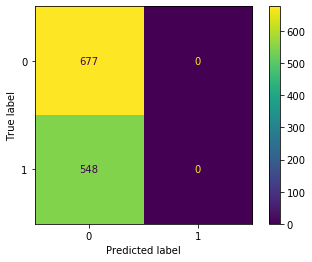

In [21]:
y_predict_dummy = dummy.predict(X_test)
print('Accuracy:', dummy.score(X_test, y_test))
print(confusion_matrix(y_test, y_predict_dummy))
plot_confusion_matrix(dummy, X_test, y_test)
predprob = dummy.predict_proba(X_test)[:,1]
print('ROC_AUC:', roc_auc_score(y_test, predprob))
f1_dum = f1_score(y_test, y_predict_dummy)
recall_dum = recall_score(y_test, y_predict_dummy)
auc_dum = roc_auc_score(y_test, dummy.predict_proba(X_test)[:,1])

In [22]:
cv_scores_test= cross_val_score(dummy,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(dummy,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_dum_test= cv_scores_test.mean()
cv_scores_dum_train= cv_scores_train.mean()
cv_scores_std_dum= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_dum_test))
print ('Mean cross validation train score: ' +str(cv_scores_dum_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_dum))

[0. 0. 0. 0. 0.]
Mean cross validation test score: 0.0
Mean cross validation train score: 0.0
Standard deviation in cv scores: 0.0


Since, I'm interested mostly in how many 'True' were predicted 'True,' the F1 Score seems especially useful for me. I may also want to look at 'Recall' to judge a model by its false negatives.

SUPERVISED LEARNING

SVM 

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[469 208]
 [204 344]]
0.6636734693877551
0.6254545454545455


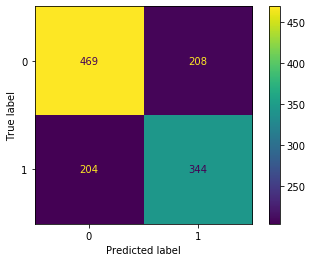

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
Accuracy_svm=svm.score(X_test,y_test)
f1_svm = f1_score(y_test, y_predict_svm)
recall_svm = recall_score(y_test, y_predict_svm)
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])

print(cnf_matrix)
print(Accuracy_svm)
print(f1_score(y_test, y_predict_svm))
plot_confusion_matrix(svm, X_test, y_test)

In [24]:
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.57142857 0.55769231 0.625      0.60425532 0.55299539]
Mean cross validation test score: 0.5822743179949768
Mean cross validation train score: 0.6334123328874239
Standard deviation in cv scores: 0.02788479617396476


The SVM does ok compared to this, given ROC_AUC. 0.5 compared to 0.67.

RANDOM FOREST

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.6375510204081632
ROC_AUC: 0.682821378128066
F1 Score: 0.5842696629213483
Recall Score: 0.5693430656934306


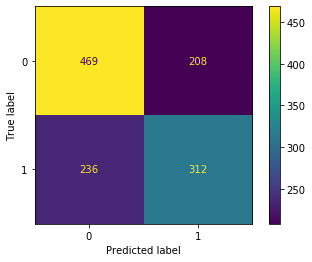

In [25]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
plot_confusion_matrix(rf, X_test, y_test)
predprob = rf.predict_proba(X_test)[:,1]
Accuracy_rf=rf.score(X_test,y_test)
f1_rf = f1_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
auc_rf = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_rf)
print('ROC_AUC:', roc_auc_score(y_test, predprob))
print('F1 Score:', f1_score(y_test, y_predict_rf))
print('Recall Score:', recall_score(y_test, y_predict_rf))


In [26]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531:

[0.50515464 0.49246231 0.56603774 0.53588517 0.55454545]
Mean cross validation test score: 0.5308170617183345
Mean cross validation train score: 0.5972521297178723
Standard deviation in cv scores: 0.028138461219079976


GRADIENT BOOST

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.6579591836734694
F1 Score: 0.608044901777362
ROC-AUC: 0.70022857389298
Recall Score: 0.593065693430657


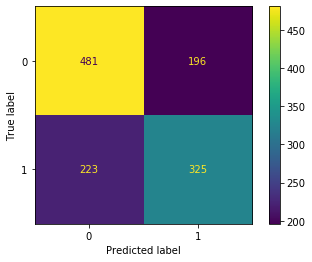

In [27]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
plot_confusion_matrix(gbc, X_test, y_test)
predprob = gbc.predict_proba(X_test)[:,1]
Accuracy_gbc=gbc.score(X_test,y_test)
f1_gbc = f1_score(y_test, y_predict_gbc)
recall_gbc = recall_score(y_test, y_predict_gbc)
auc_gbc = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_gbc)
print('F1 Score:', f1_score(y_test, y_predict_gbc))
print('ROC-AUC:', roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))
print('Recall Score:', recall_score(y_test, y_predict_gbc))


In [28]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.52380952 0.52427184 0.58181818 0.57798165 0.55752212]
Mean cross validation test score: 0.5530806651115705
Mean cross validation train score: 0.6004516516473274
Standard deviation in cv scores: 0.025109274734446973


LOGISTIC REGRESSION

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.6840816326530612
F1 Score: 0.6491387126019946
ROC-AUC: 0.7181856408155344
Recall Score: 0.6532846715328468


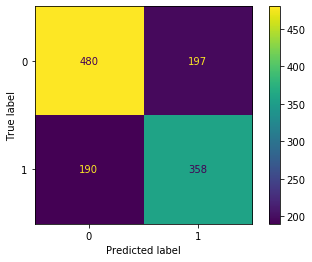

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict_lr)
plot_confusion_matrix(lr, X_test, y_test)

predprob = lr.predict_proba(X_test)[:,1]
Accuracy_lr=lr.score(X_test,y_test)
f1_lr = f1_score(y_test, y_predict_lr)
recall_lr = recall_score(y_test, y_predict_lr)
auc_lr = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_lr)
print('F1 Score:', f1_score(y_test, y_predict_lr))
print('ROC-AUC:', roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print('Recall Score:', recall_score(y_test, y_predict_lr))


In [30]:
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

[0.55882353 0.58373206 0.6146789  0.58823529 0.5437788 ]
Mean cross validation test score: 0.5778497163743134
Mean cross validation train score: 0.627745147083908
Standard deviation in cv scores: 0.024583221381531756


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
models = ['dummy', 'svm', 'rf', 'gbc', 'lr']
auc = [auc_dum, auc_svm, auc_rf, auc_gbc, auc_lr]
recall = [recall_dum, recall_svm, recall_rf, recall_gbc, recall_lr]
cv_f1_train = [cv_scores_dum_train, cv_scores_svm_train, cv_scores_rf_train, cv_scores_gbc_train, cv_scores_lr_train]
cv_f1_test = [cv_scores_dum_test, cv_scores_svm_test, cv_scores_rf_test, cv_scores_gbc_test, cv_scores_lr_test]

df = pd.DataFrame(list(zip(models, auc, recall, cv_f1_train, cv_f1_test)),
                 columns = ['Model', 'AUC Score', 'Recall Score', 'CV F1 Scores: Train', 'CV F1 Scores: Test'])
df

,Model,AUC Score,Recall Score,CV F1 Scores: Train,CV F1 Scores: Test
0,dummy,0.500000,0.000000,0.000000,0.000000
1,svm,0.717434,0.627737,0.633412,0.582274
2,rf,0.682821,0.569343,0.597252,0.530817
3,gbc,0.700229,0.593066,0.600452,0.553081
4,lr,0.718186,0.653285,0.627745,0.577850


The highest performing models were SVM and Logistic Regression.

HYPERPARAMETER TUNING

Logistic Regression

In [37]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.634350 using {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.632362 (0.022590) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.634350 (0.022947) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.632149 (0.022031) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.632685 (0.021394) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.632343 (0.022052) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.632362 (0.022590) with: {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}
0.634350 (0.022947) with: {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 10, 'penalty': 'none', 'solver': 'liblinear'}
0.631085 (0.021869) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.630713 (0.020829) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.630408 (0.022695) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.632362 (0.022590) with: {'C': 1.0,

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

0.6444043321299638


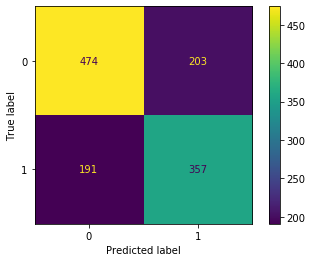

In [56]:
lr = LogisticRegression(C=100, penalty='none', solver='lbfgs')
lr.fit(X_train, y_train)
y_predict_lr_tune = lr.predict(X_test)
print(f1_score(y_test, y_predict_lr_tune))
plot_confusion_matrix(lr, X_test, y_test)


USING SMOTE TO CREATE MORE SAMPLES OF MY LESS REPRESENTED CLASS

0.6407079646017699


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


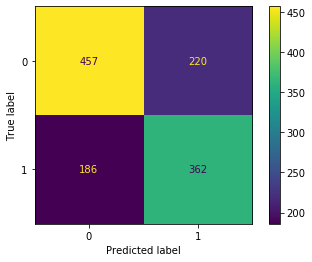

In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values)

#Best: 0.634350 using {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}

clf = LogisticRegression(C=100, penalty='none', solver='lbfgs')
model_res = clf.fit(X_train_res, y_train_res)
y_predict_lr_res =  model_res.predict(X_test)
print(f1_score(y_test, y_predict_lr_res))
plot_confusion_matrix(model_res, X_test, y_test)

The score decreased.

# Why is the above code consistently giving me 0.64 test score, but the below Cross_val is 0.58.
# Why do cross_val again?

In [59]:
cv_scores_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='f1')
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[0.56190476 0.5971564  0.64       0.57522124 0.57522124]
Mean cross validation train score: 0.6343501302859245
Mean cross validation test score: 0.5899007275770268
Standard deviation in cv scores: 0.02748574437572057


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Little Aside, to Visualize Which Race the Predicted Black/Hispanic Fatalities Actually Belong To

In [78]:
idx = X_test[y_predict_lr == 1].index
df = pd.read_csv('../data/processed/fatalwrangling.csv', index_col=0)
df.loc[idx].race.value_counts()

B    202
W    178
H    156
A     13
N      4
O      2
Name: race, dtype: int64

SVM, Hyperparameter Tuning

In [ ]:
cw = ['balanced', None]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.01, .1, 1, 10, 100, 1000]
gamma = ['scale','auto']
grid = dict(class_weight=cw, kernel=kernel, C=C, gamma=gamma)

model = SVC()

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=5, scoring='f1', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Why does my source that I'm following use cv = RepeatedStratifiedKFold(....) instead of cv=5?
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))